In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [93]:
include("./Distributions.jl")
using .MakeDistributions

include("./Plots.jl")
using .Plots

In [3]:
using DataFrames, DataFramesMeta, GLM
# using Statistics, StatsBase
using CodecZlib, MatrixMarket
using CSV

In [4]:
df = CSV.read("./Data/genetic_data/10331_raw_counts.csv", DataFrame; delim = ',');

In [5]:
A = Matrix(df[:, 2:end])'
M = A ./ sum(A, dims=1);

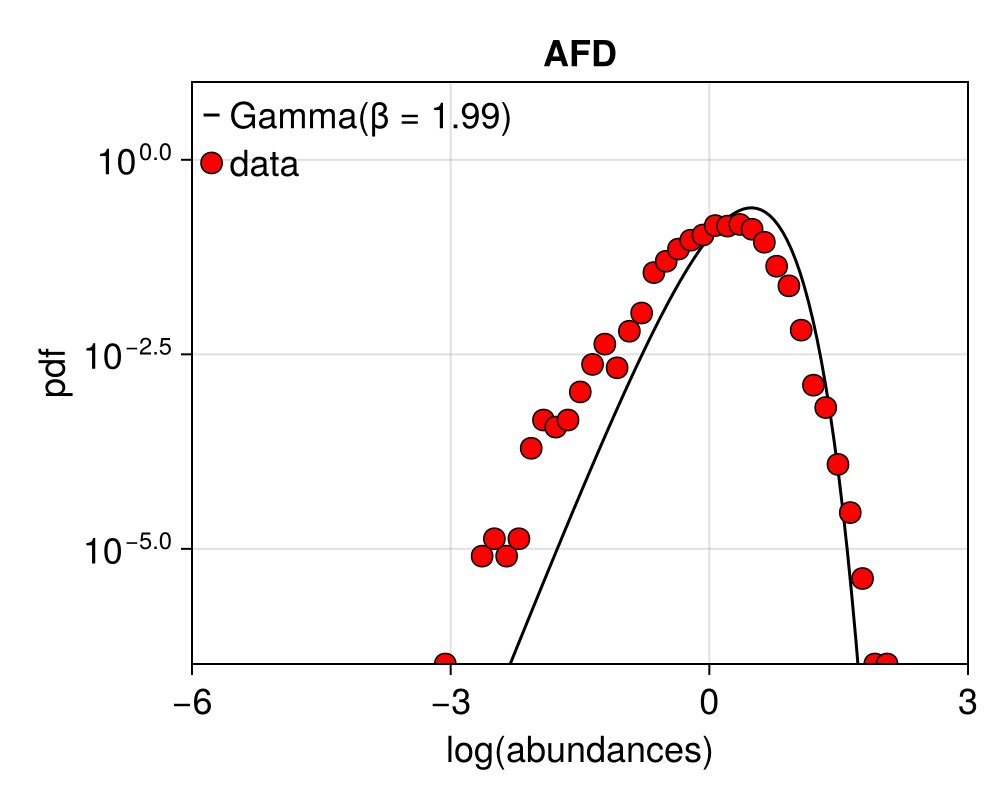

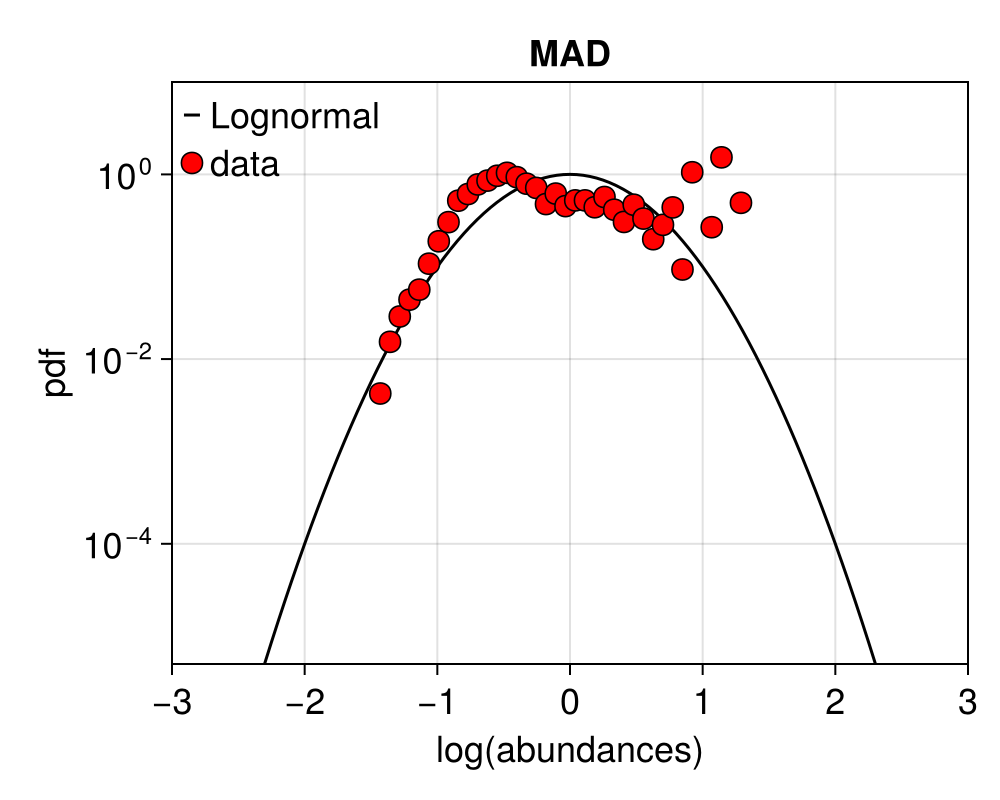

CairoMakie.Screen{IMAGE}


In [94]:
# Compute distributions
afd = MakeDistributions.make_AFD(M; missing_thresh=1, Δb=0.2, env="AFD")
# taylor = MakeDistributions.make_Taylor(M; Δb=0.0002, env="TAYLOR")
mad = MakeDistributions.make_MAD(M; Δb=0.2, env="MAD", c=exp(-25))

fig = Plots.combine_AFD_histograms([afd], nrows=1, ncols=1, fig_size=(500, 400), data_label="data", savepath=nothing)
display(fig)

# fig = Plots.combine_Taylor_histograms(TAYLORs, nrows=2, ncols=4, savepath=nothing)
# display(fig)

fig = Plots.combine_MAD_histograms([mad], nrows=1, ncols=1, fig_size=(500, 400), data_label="data", savepath=nothing)
display(fig)